# Three level atom (ladder)

We import all FAST functions and other useful things.

In [1]:
from fast.all import *
%matplotlib inline
from matplotlib import pyplot
from fast.config import parallel, use_netcdf
from numpy import array

We establish the basic characteristics of the experiment. The path in which we will work, and the name of the experiment.

In [2]:
path='./2-three_level_atom_ladder/'
name='suite'

The number of states.

In [3]:
Ne=3

We define the properties of the atom.

In [4]:
omega_states=[0,200,500]
omega=[[omega_states[i]-omega_states[j] for j in range(Ne)] for i in range(Ne)]
print array(omega)

[[   0 -200 -500]
 [ 200    0 -300]
 [ 500  300    0]]


In [5]:
gamma21=6.0
gamma32=0.6
gamma31=0.0

gamma=[[0.0	,		-gamma21,	-gamma31],
	   [gamma21,	0.0,		-gamma32],
	   [gamma31,	gamma32,	0.0		]]
print array(gamma)

[[ 0.  -6.  -0. ]
 [ 6.   0.  -0.6]
 [ 0.   0.6  0. ]]


In [6]:
r=[ [[0,1,0],
	 [1,0,1],
	 [0,1,0]] for i in range(3)]
print array(r)

[[[0 1 0]
  [1 0 1]
  [0 1 0]]

 [[0 1 0]
  [1 0 1]
  [0 1 0]]

 [[0 1 0]
  [1 0 1]
  [0 1 0]]]


We define the lasers.

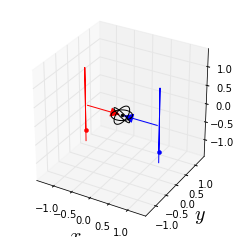

In [7]:
l1=PlaneWave(0,pi/2,0,0 ,color='red')
l2=PlaneWave(pi,pi/2,0,0,color='blue')
lasers=[l1,l2]
Nl=len(lasers)
fig = pyplot.figure(); ax = fig.gca(projection='3d')
draw_lasers_3d(ax,lasers,name=path+name+'_lasers.png')

We specify the couplings between the states. In this case, the transition
$|1\rangle \rightarrow |2\rangle$ is coupled by laser 1, and
$|2\rangle \rightarrow |3\rangle$ is coupled by laser 2.

In [8]:
Lij=[[1,2,[1]],[2,3,[2]]]
Lij=formatLij(Lij,Ne)
print array(Lij)

[[[] [1] []]
 [[1] [] [2]]
 [[] [2] []]]


We draw a level diagram.

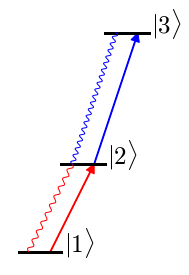

In [9]:
fig=pyplot.figure(); ax=fig.add_subplot(111,aspect="equal")

p1=[0.5,0]; p2=[1.5,2]; p3=[2.5,5]
draw_state(ax,p1,text=r"$|1\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=3.0)
draw_state(ax,p2,text=r"$|2\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=3.0)
draw_state(ax,p3,text=r"$|3\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=3.0)

excitation(ax,[p1[0]+0.25,p1[1]],[p2[0]+0.25,p2[1]], fc="red", ec="red",width=0.02, head_width=0.2, head_length=0.2)
decay(     ax,[p1[0]-0.25,p1[1]],[p2[0]-0.25,p2[1]], 0.05,10.0,color="red",linewidth=1.0)

excitation(ax,[p2[0]+0.25,p2[1]],[p3[0]+0.25,p3[1]], fc="blue", ec="blue",width=0.02, head_width=0.2, head_length=0.2)
decay(     ax,[p2[0]-0.25,p2[1]],[p3[0]-0.25,p3[1]], 0.05,20.0,color="blue",linewidth=1.0)

ax.set_xlim([0,3.5]); ax.set_ylim([-0.05,5.05])
pyplot.axis('off')
pyplot.savefig(path+name+'_diagram.png',bbox_inches="tight")

## Time evolution

We write the Fortran code.

In [10]:
write_evolution(path,name+"_evolution",lasers,omega,gamma,r,Lij)

0.08531999588012695

We compile it.

In [11]:
compile_code(path,name+"_evolution",lapack=True,parallel=parallel)

0.5393290519714355

We give the detuning of the first laser and the ampliude of the electric field.

In [12]:
delta1=1.0; E00=1.0

We run the time evolution.

In [13]:
run_evolution(path,name+"_evolution",[ 15*E00, 5*E00],[delta1,0.0],  3000,  0.002,Ne,rho0=[0.0,1.0],use_netcdf=use_netcdf)

0.11838793754577637

We read the resultas and we plot them.

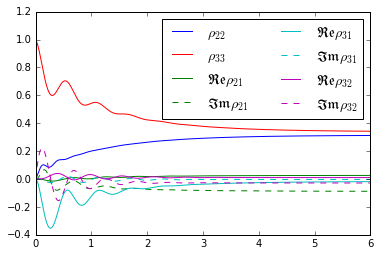

In [14]:
t,rho22   =read_result(path,name+"_evolution",i=2,j=2,s=+1,N=Ne,use_netcdf=use_netcdf)
t,rho33   =read_result(path,name+"_evolution",i=3,j=3,s=+1,N=Ne,use_netcdf=use_netcdf)

t,rho21_re=read_result(path,name+"_evolution",i=2,j=1,s=+1,N=Ne,use_netcdf=use_netcdf)
t,rho21_im=read_result(path,name+"_evolution",i=2,j=1,s=-1,N=Ne,use_netcdf=use_netcdf)

t,rho31_re=read_result(path,name+"_evolution",i=3,j=1,s=+1,N=Ne,use_netcdf=use_netcdf)
t,rho31_im=read_result(path,name+"_evolution",i=3,j=1,s=-1,N=Ne,use_netcdf=use_netcdf)

t,rho32_re=read_result(path,name+"_evolution",i=3,j=2,s=+1,N=Ne,use_netcdf=use_netcdf)
t,rho32_im=read_result(path,name+"_evolution",i=3,j=2,s=-1,N=Ne,use_netcdf=use_netcdf)

fig=pyplot.figure(); ax=fig.add_subplot(111)
ax.plot(t,rho22,'b-'    ,label=r"$\rho_{22}$")
ax.plot(t,rho33,'r-'    ,label=r"$\rho_{33}$")
ax.plot(t,rho21_re,'g-' ,label=r"$\mathfrak{Re}\rho_{21}$")
ax.plot(t,rho21_im,'g--',label=r"$\mathfrak{Im}\rho_{21}$")
ax.plot(t,rho31_re,'c-' ,label=r"$\mathfrak{Re}\rho_{31}$")
ax.plot(t,rho31_im,'c--',label=r"$\mathfrak{Im}\rho_{31}$")
ax.plot(t,rho32_re,'m-' ,label=r"$\mathfrak{Re}\rho_{32}$")
ax.plot(t,rho32_im,'m--',label=r"$\mathfrak{Im}\rho_{32}$")

ax.legend(loc=0,ncol=2,fontsize=14)

pyplot.savefig(path+'evolution_'+name+'.png',bbox_inches='tight')

### Autler-Townes splitting

In this scheme we mantain the first laser in high power, and vary the detuning of the second laser (on low power) to obtain a spectrum.

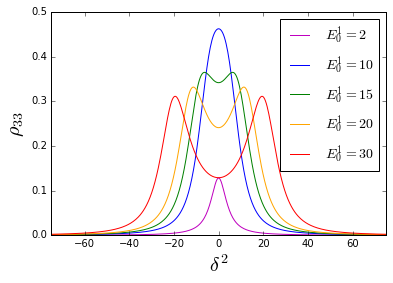

In [15]:
fig=pyplot.figure(); ax=fig.add_subplot(111)

E0    =[2.0,10.0,15.0,20.0,30.0]
colors=['m', 'b', 'g', "orange", 'r']
for i in range(len(E0)):
	run_evolution(path,name+"_evolution",[E0[i],5.0],[0.0,-75.0],  3000,  0.01,
				  Ne,spectrum_of_laser=2,N_delta=401,frequency_end=75.0,use_netcdf=use_netcdf)
	
	delta,rho33=read_result(path,name+"_evolution",i=3,j=3,s= 1,N=Ne,use_netcdf=use_netcdf)

	ax.plot(delta,rho33,'-',color=colors[i],label=r"$E_0^1="+str(int(E0[i]))+"$")

ax.set_xlim([-75.0,75.0])
ax.set_xlabel(r"$\delta^2$",fontsize=20)
ax.set_ylabel(r"$\rho_{33}$",fontsize=20)
ax.legend(loc=0,fontsize=14)
pyplot.savefig(path+name+'_spectrum_evolution.png',bbox_inches='tight')

## Steady state

We write the Fortran code of the experiment.

In [16]:
write_stationary(path,name+"_steady",lasers,omega,gamma,r,Lij)

0.033509016036987305

We compile it.

In [17]:
compile_code(path,name+"_steady",lapack=True,parallel=parallel)

0.21913409233093262

We repeat the same spectra using the steady state.

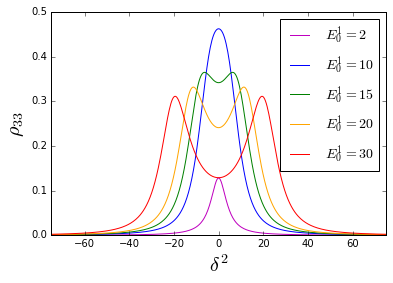

In [18]:
fig=pyplot.figure(); ax=fig.add_subplot(111)

E0    =[2.0,10.0,15.0,20.0,30.0]
colors=['m', 'b', 'g', "orange", 'r']
for i in range(len(E0)):
	run_stationary(path,name+"_steady",[E0[i],5.0],[0.0,-75.0],
				  spectrum_of_laser=2,N_delta=401,frequency_end=75.0,use_netcdf=use_netcdf)
	
	delta,rho33=read_result(path,name+"_steady",i=3,j=3,s= 1,N=Ne,use_netcdf=use_netcdf)

	ax.plot(delta,rho33,'-',color=colors[i],label=r"$E_0^1="+str(int(E0[i]))+"$")

ax.set_xlim([-75.0,75.0])
ax.set_xlabel(r"$\delta^2$",fontsize=20)
ax.set_ylabel(r"$\rho_{33}$",fontsize=20)
ax.legend(loc=0,fontsize=14)
pyplot.savefig(path+name+'_spectrum_steady.png',bbox_inches='tight')